<a href="https://colab.research.google.com/github/Nadezda-Sut/statistics_in_science/blob/main/statistics_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# COURSE: Master Python for scientific programming by solving projects
## PROJECT: Statistics
#### TEACHER: Mike X Cohen, sincxpress.com
##### COURSE URL: udemy.com/course/maspy_x/?couponCode=202201

In [ ]:
# import all necessary modules
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import scipy.stats as stats

# Download and inspect the data

In [ ]:
#link google colab and google drive

from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
# path to file in google drive

file_path = "/content/gdrive/My Drive/Colab Notebooks/ddddd.csv"
data = pd.read_csv(file_path)
data

In [ ]:
# describe the data

data.describe()

,№,Игра ош,Возраст,Наличие устройства,Время в будни с гадж,Ср 1 1,Ср 1 2,Пропуск 1 1,Пропуск 1 2,Ср 2 1,Ср 2 2,Пропуск 2 1,Проауск 2 2,Ошибка 2 1,Ошибка 2 2
count,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000
mean,6.200000,5.100000,6.400000,0.700000,1.400000,454.810000,446.440000,3.900000,2.800000,529.890000,516.910000,4.100000,3.400000,11.800000,9.400000
std,3.425395,2.282786,0.699206,0.483046,0.516398,53.317174,55.443809,2.424413,1.686548,69.404714,62.835278,3.725289,3.025815,4.341019,5.125102
min,1.000000,1.000000,5.000000,0.000000,1.000000,385.800000,362.200000,0.000000,0.000000,453.100000,441.100000,0.000000,0.000000,7.000000,2.000000
25%,3.500000,3.500000,6.000000,0.250000,1.000000,425.550000,415.850000,3.000000,1.250000,473.875000,483.350000,2.000000,1.250000,8.250000,8.000000
50%,6.500000,6.000000,6.500000,1.000000,1.000000,444.750000,440.450000,4.000000,3.500000,518.600000,501.700000,3.000000,2.500000,10.500000,8.500000
75%,8.750000,7.000000,7.000000,1.000000,2.000000,470.350000,473.300000,4.750000,4.000000,556.500000,548.725000,7.000000,5.000000,14.500000,11.750000
max,11.000000,7.000000,7.000000,1.000000,2.000000,556.600000,555.100000,8.000000,5.000000,671.600000,621.100000,11.000000,9.000000,20.000000,20.000000


In [ ]:
# variable names

data.keys()

Index(['№', 'Имя', 'Игра ош', 'Возраст ', 'Наличие устройства',
       'Время в будни с гадж', 'Ср 1 1', 'Ср 1 2 ', 'Пропуск 1 1',
       'Пропуск 1 2', 'Ср 2 1', 'Ср 2 2 ', 'Пропуск 2 1', 'Проауск 2 2',
       'Ошибка 2 1', 'Ошибка 2 2'],
      dtype='object')

In [ ]:
data.keys()[7]

'Ср 1 2 '

In [ ]:
# variable values

data['fixation_duration(millisec,conf>0,6)']

0     124.94
1     121.19
2     175.77
3     176.45
4     118.43
5     132.17
6     150.09
7     152.41
8     149.64
9     140.89
10    146.73
11    146.71
Name: fixation_duration(millisec,conf>0,6), dtype: float64

In [ ]:
# list of unique values and amount of unique values

print(np.unique(data['fixation_duration(millisec,conf>0,6)']))
len(np.unique(data['fixation_duration(millisec,conf>0,6)']))

[118.43 121.19 124.94 132.17 140.89 146.71 146.73 149.64 150.09 152.41
 175.77 176.45]


12

In [ ]:
# unique values

for i in data.keys():
  print(f"Column {i} has {len(np.unique(data[i]))} unique values")

Column N has 12 unique values
Column Name has 6 unique values
Column sex has 2 unique values
Column age has 2 unique values
Column parental_education(1_higher) has 2 unique values
Column siblings_amount has 3 unique values
Column phone_1/comp_0 has 2 unique values
Column fixation_duration(millisec,conf>0,6) has 12 unique values
Column stand_otclon_fixation_duration has 12 unique values
Column fixation_dispersion(degrees) has 9 unique values
Column stand_otclon_fixation_dispersion has 9 unique values
Column pupil_diameter(pixels,conf>0,6) has 12 unique values
Column stand_otclon_pupil_diameter has 11 unique values
Column reading_time(sec) has 10 unique values


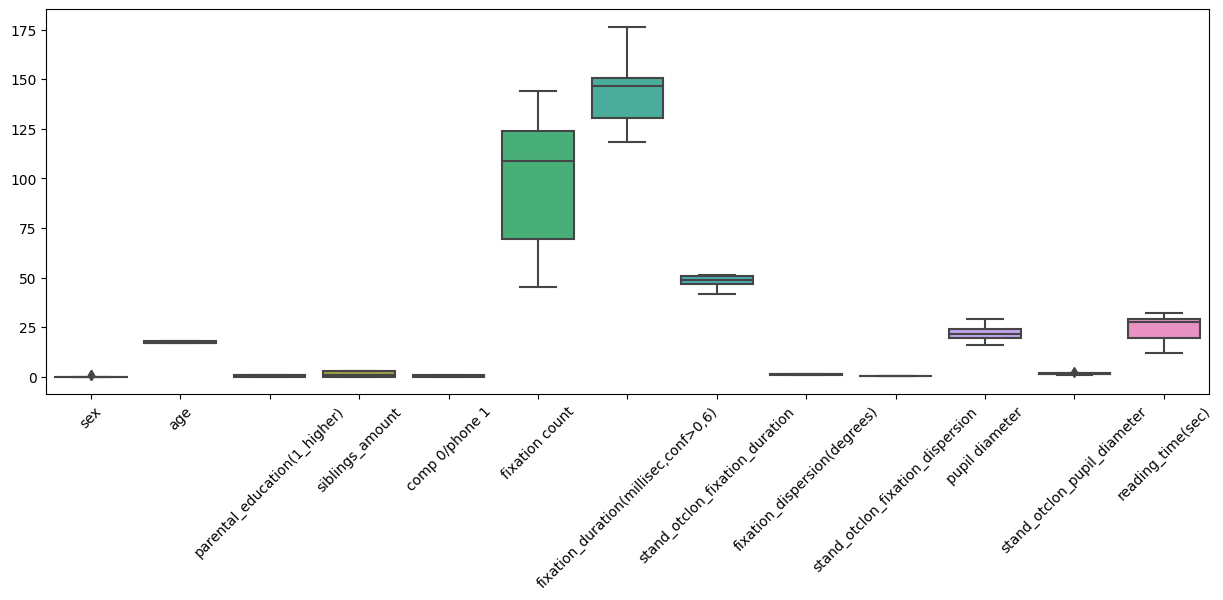

In [ ]:
fig,ax = plt.subplots(1,figsize=(15,5))

ax = sns.boxplot(data=data)
ax.set_xticklabels(ax.get_xticklabels(),rotation=45)

plt.show()

In [ ]:
# remove outliers

data = data[data['phone_1/comp_0']< 2 ]

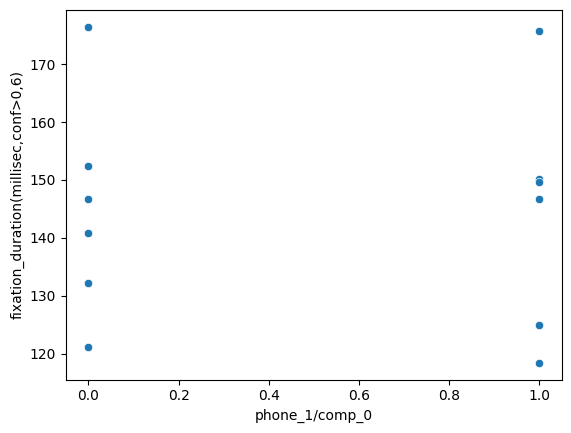

In [ ]:
# visual data exploration

sns.scatterplot(x=data['phone_1/comp_0'],y=data['fixation_duration(millisec,conf>0,6)'])
plt.show()

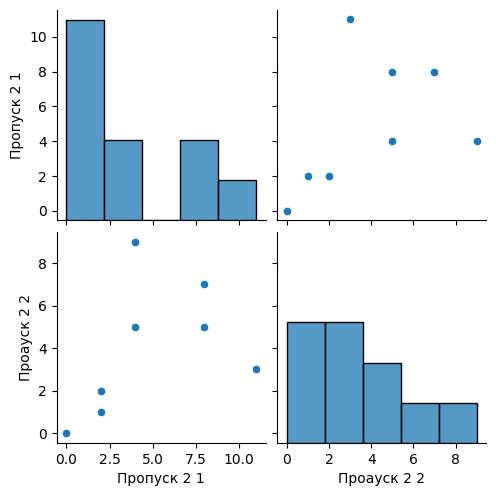

In [ ]:
sns.pairplot(data[[ 'Пропуск 2 1', 'Проауск 2 2']])
plt.show()

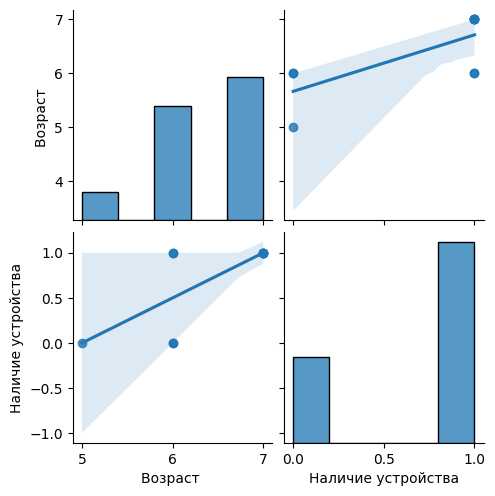

In [ ]:
sns.pairplot(data[['Возраст ', 'Наличие устройства']],kind='reg')
plt.show()

In [ ]:
import pandas as pd

# Assuming 'data' is your DataFrame
print(data.columns)


Index(['№', 'Имя', 'Игра ош', 'Возраст ', 'Наличие устройства',
       'Время в будни с гадж', 'Ср 1 1', 'Ср 1 2 ', 'Пропуск 1 1',
       'Пропуск 1 2', 'Ср 2 1', 'Ср 2 2 ', 'Пропуск 2 1', 'Проауск 2 2',
       'Ошибка 2 1', 'Ошибка 2 2'],
      dtype='object')


KeyError: ignored

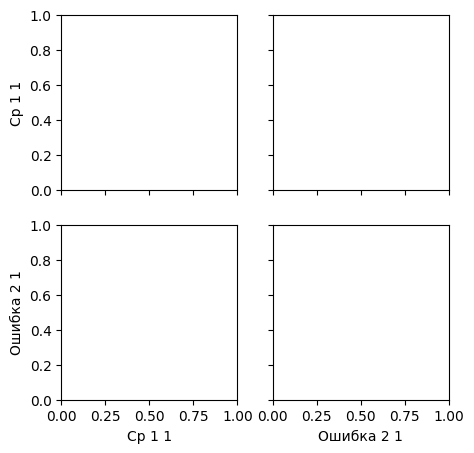

In [ ]:
sns.pairplot(data[['Ср 1 1','Ошибка 2 1']],kind='reg',hue='Наличие устройства')
#plt.legend(labels=["comp","phone"])
plt.show()

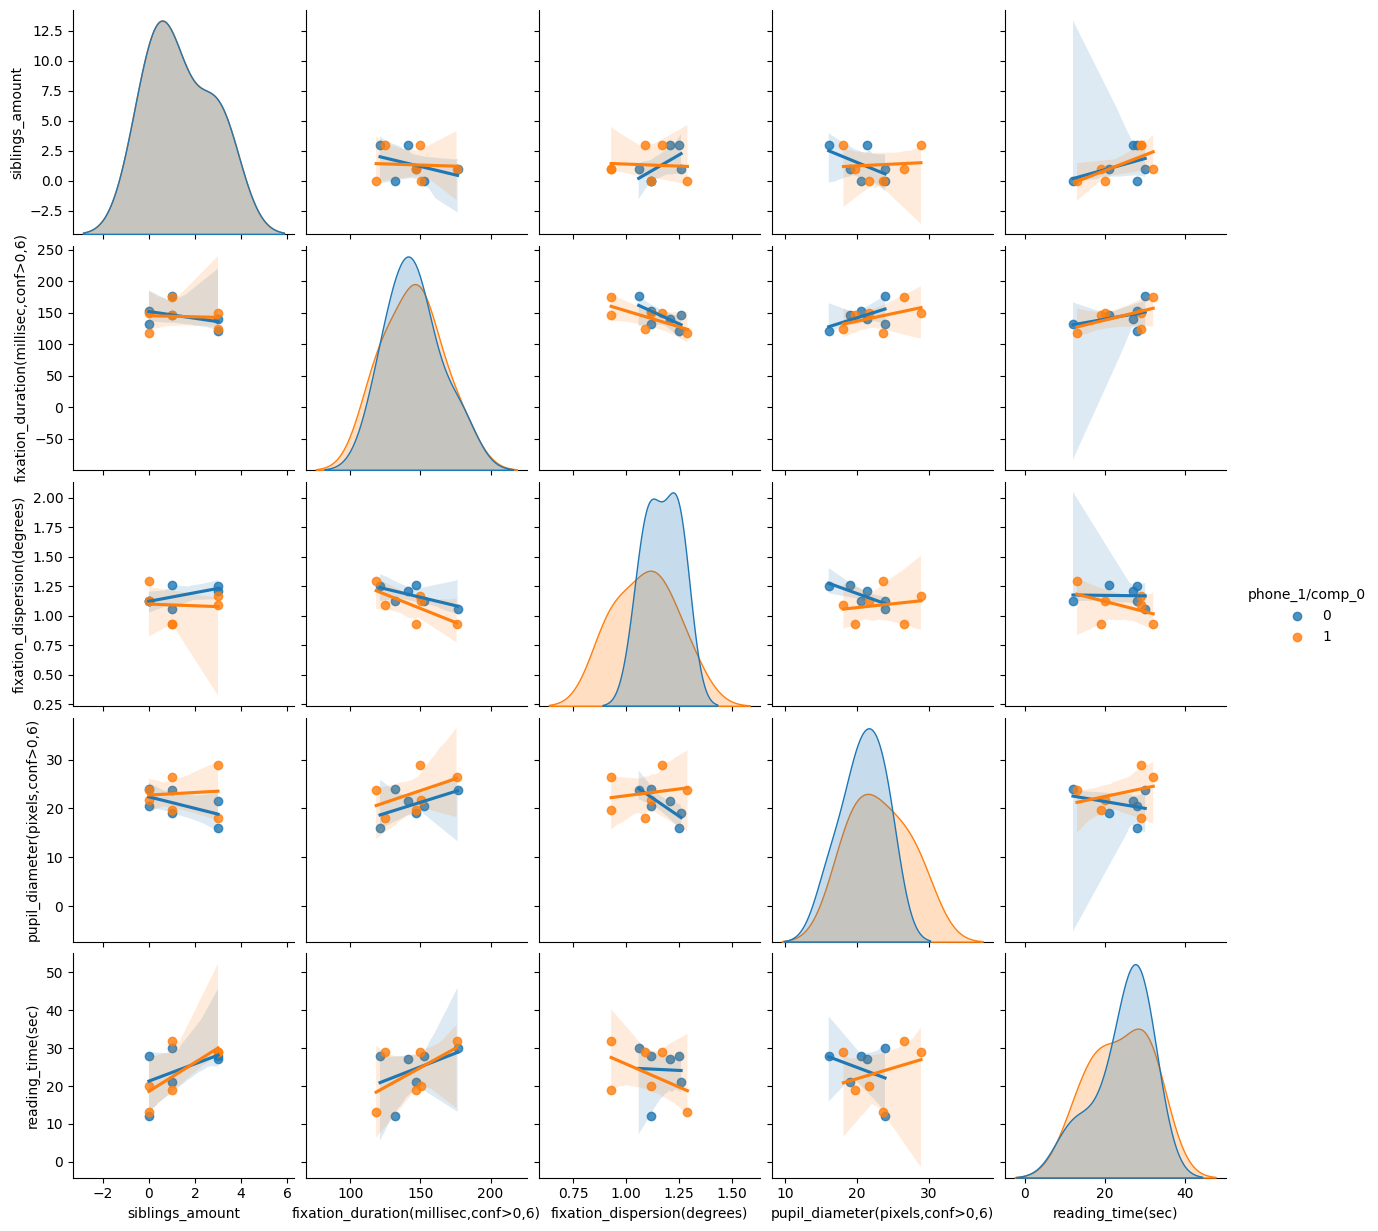

In [ ]:
cols2plot = ['siblings_amount', 'phone_1/comp_0',
       'fixation_duration(millisec,conf>0,6)', 'fixation_dispersion(degrees)',
       'pupil_diameter(pixels,conf>0,6)', 'reading_time(sec)']
sns.pairplot(data[cols2plot],kind='reg',hue='phone_1/comp_0')
plt.show()

# T-test analysis




In [ ]:
import pandas as pd

# Assuming 'data' is your DataFrame
print(data.columns)


Index(['№', 'Имя', 'Игра ош', 'Возраст ', 'Наличие устройства',
       'Время в будни с гадж', 'Ср 1 1', 'Ср 1 2 ', 'Пропуск 1 1',
       'Пропуск 1 2', 'Ср 2 1', 'Ср 2 2 ', 'Пропуск 2 1', 'Проауск 2 2',
       'Ошибка 2 1', 'Ошибка 2 2'],
      dtype='object')


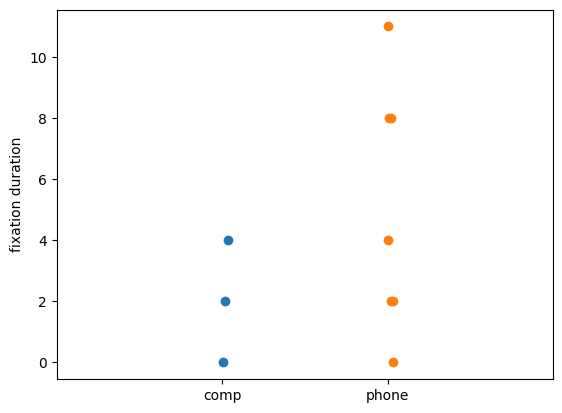

In [ ]:
# show the data in a plot

x = data['Пропуск 2 1'][data['Наличие устройства'] == 0]
y = data['Пропуск 2 1'][data['Наличие устройства'] == 1]


plt.plot(np.random.rand(len(x))/30,x,'o',
         np.random.rand(len(y))/30+1,y,'o')

plt.xlim([-1,2])                                 # indents on sides
plt.xticks([0,1],labels=['comp','phone'])        # only two values on x
plt.ylabel('fixation duration')

plt.show()


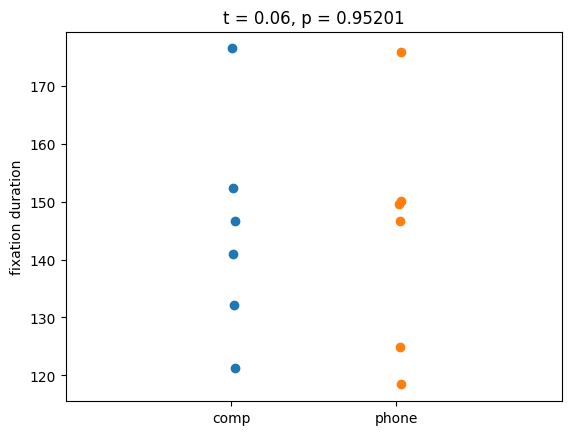

In [ ]:
# t-test of fixation_duration on phone/comp

x = data['fixation_duration(millisec,conf>0,6)'][data['phone_1/comp_0'] == 0]
y = data['fixation_duration(millisec,conf>0,6)'][data['phone_1/comp_0'] == 1]

#ttest
ttest = stats.ttest_ind(x,y)


plt.plot(np.random.rand(len(x))/30,x,'o',
         np.random.rand(len(y))/30+1,y,'o')

plt.xlim([-1,2])                                 # indents on sides
plt.xticks([0,1],labels=['comp','phone'])        # only two values on x
plt.title(f't = {ttest[0]:.2f}, p = {ttest[1]:.5f}')  # :.2f --- amount(two) of digits after comma
plt.ylabel('fixation duration')

plt.show()


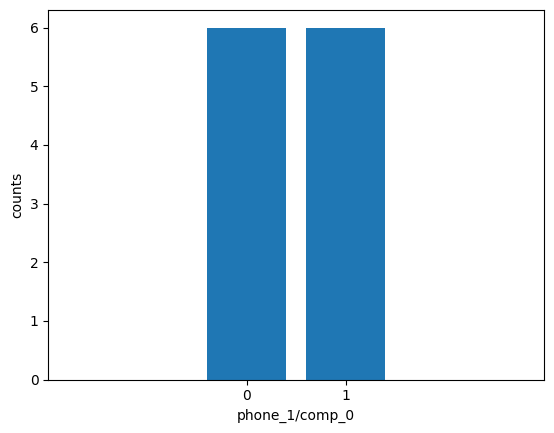

In [ ]:
phone_comp = np.zeros(2)

for i in range(0,2):
  phone_comp[i] = len(data[data['phone_1/comp_0'] == i])

plt.bar(range(0,2),phone_comp)
plt.xlabel('phone_1/comp_0')
plt.ylabel('counts')
plt.xlim([-2,3])
plt.xticks([0,1])
plt.show()

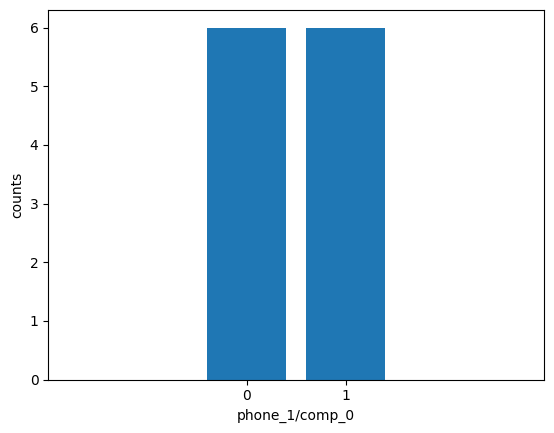

In [ ]:
counts = data['phone_1/comp_0'].value_counts()

plt.bar(list(counts.keys()),counts)
plt.xlabel('phone_1/comp_0')
plt.ylabel('counts')
plt.xlim([-2,3])
plt.xticks([0,1])
plt.show()

In [ ]:
import pandas as pd

# Assuming 'data' is your DataFrame
print(data.columns)


Index(['№', 'Имя', 'Игра ош', 'Возраст ', 'Наличие устройства',
       'Время в будни с гадж', 'Ср 1 1', 'Ср 1 2 ', 'Пропуск 1 1',
       'Пропуск 1 2', 'Ср 2 1', 'Ср 2 2 ', 'Пропуск 2 1', 'Проауск 2 2',
       'Ошибка 2 1', 'Ошибка 2 2'],
      dtype='object')


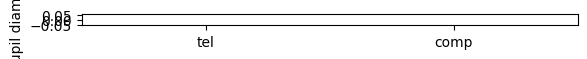

In [ ]:
# t-test of fixation_duration on siblings

var_in = 'Пропуск 2 1'
var_d = 'Наличие устройства'
x = data[var_in] [(data[var_d] == '1_1') | (data[var_d] == '2_1') | (data[var_d] == '3_1')
       | (data[var_d] == '4_1') | (data[var_d] == '5_1') | (data[var_d] == '6_1')]
y = data[var_in] [(data[var_d] == '1_2') | (data[var_d] == '2_2') | (data[var_d] == '3_2')
       | (data[var_d] == '4_2') | (data[var_d] == '5_2') | (data[var_d] == '6_2')]


#ttest
ttest = stats.ttest_ind(x,y)

plt.plot(np.random.rand(len(x))/30,x,'o',
         np.random.rand(len(y))/30+1,y,'o',
         markeredgecolor='k')

plt.xlim([-.5,1.5])   # indents on sides
#plt.axis('square')
plt.gca().set_aspect(.4)
plt.xticks([0,1],labels=['tel','comp'])            # only two values on x

#plt.title(f't = {ttest[0]:.2f}, p = {ttest[1]:.5f}')     # plt.xticks([0,1],labels=['время чтения < ср.','время чтения > ср.'])
                           # :.2f --- amount(two) of digits after comma
plt.ylabel('pupil diameter')

plt.show()


# Multiple regression

In [ ]:
import statsmodels.api as sm

In [ ]:
# predict siblings_amount from all other columns; show in a table

dep_var  =  data['siblings_amount']                                                                      # dependent variable
ind_vars =  data.drop(labels = ['siblings_amount','Name','N', 'stand_otclon_fixation_duration',          # independent variables
                    'stand_otclon_fixation_dispersion', 'stand_otclon_pupil_diameter'], axis=1)
ind_vars = sm.add_constant(ind_vars)                                                                     # add an intercept term

# setup and run the model
model = sm.OLS(dep_var,ind_vars).fit()

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:        siblings_amount   R-squared:                       0.839
Model:                            OLS   Adj. R-squared:                  0.556
Method:                 Least Squares   F-statistic:                     2.968
Date:                Sun, 02 Apr 2023   Prob (F-statistic):              0.155
Time:                        20:22:22   Log-Likelihood:                -8.7362
No. Observations:                  12   AIC:                             33.47
Df Residuals:                       4   BIC:                             37.35
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                                           coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------


/usr/local/lib/python3.9/dist-packages/scipy/stats/_stats_py.py:1736: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=12
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


reading_time(sec)


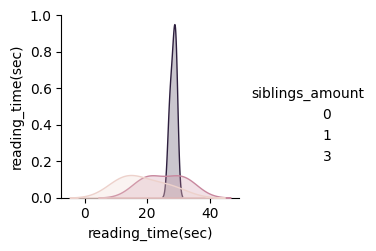

In [ ]:
# vertical list of all significant (p<.05) columns

significant_columns = list(model.pvalues[model.pvalues < .07].keys())
[print(i) for i in significant_columns];
significant_columns.append('siblings_amount')

# pairwise plots just for significant effects

sns.pairplot(data[significant_columns],kind = 'reg',hue = 'siblings_amount')

plt.show()


In [ ]:
#


# Logistic regression

In [ ]:
# binarize phone_1/comp_0 (the subject used a computer or telephone)
# binarization threshold

binthresh = np.mean(data['phone_1/comp_0'])

# 'binquality' column with Boolean type True or False

data['binquality'] = data['phone_1/comp_0'] > binthresh
data


,N,Name,sex,age,parental_education(1_higher),siblings_amount,phone_1/comp_0,"fixation_duration(millisec,conf>0,6)",stand_otclon_fixation_duration,fixation_dispersion(degrees),stand_otclon_fixation_dispersion,"pupil_diameter(pixels,conf>0,6)",stand_otclon_pupil_diameter,reading_time(sec),binquality
0,1_1,N_S,0,18,0,3,1,124.94,42.56,1.09,0.35,18.11,1.04,29,True
1,1_2,N_S,0,18,0,3,0,121.19,41.51,1.25,0.23,16.06,1.58,28,False
2,2_1,T_E,0,17,1,1,1,175.77,48.28,0.93,0.41,26.49,1.81,32,True
3,2_2,T_E,0,17,1,1,0,176.45,51.07,1.06,0.35,23.84,1.46,30,False
4,3_1,R_A,0,17,1,0,1,118.43,44.59,1.29,0.24,23.68,1.18,13,True
5,3_2,R_A,0,17,1,0,0,132.17,49.66,1.12,0.35,23.91,1.39,12,False
6,4_1,G_A,1,18,0,0,1,150.09,47.22,1.12,0.31,21.71,0.92,20,True
7,4_2,G_A,1,18,0,0,0,152.41,50.62,1.12,0.33,20.52,1.75,28,False
8,5_1,T_K,0,17,1,3,1,149.64,51.25,1.17,0.28,28.92,2.19,29,True
9,5_2,T_K,0,17,1,3,0,140.89,51.09,1.21,0.27,21.46,1.31,27,False


In [ ]:
# create a list containing columns to use in regression
# this is all the columns except for dependent variable and binquality

xcols = []

for key in data.keys():
  if key not in ['phone_1/comp_0','binquality','N','Name','stand_otclon_fixation_duration',
                     'stand_otclon_fixation_dispersion','stand_otclon_pupil_diameter','age','sex',
                 'parental_education(1_higher)']:
                     xcols.append(key)
xcols

['siblings_amount',
 'fixation_duration(millisec,conf>0,6)',
 'fixation_dispersion(degrees)',
 'pupil_diameter(pixels,conf>0,6)',
 'reading_time(sec)']

In [ ]:
# setup and run the logistic regression model
model = sm.Logit(data['binquality'],data[xcols])
results = model.fit(method='newton')

# have a look at the results!
results.summary()

Optimization terminated successfully.
         Current function value: 0.551443
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:             binquality   No. Observations:                   12
Model:                          Logit   Df Residuals:                        7
Method:                           MLE   Df Model:                            4
Date:                Sun, 02 Apr 2023   Pseudo R-squ.:                  0.2044
Time:                        21:53:52   Log-Likelihood:                -6.6173
converged:                       True   LL-Null:                       -8.3178
Covariance Type:            nonrobust   LLR p-value:                    0.4931
========================================================================================================
                                           coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------
siblings_amount                          0.2426      0.909      0.267      0.790      -1.539       2.024
fixation_duration(millisec,conf>0,6)    -0.0328      0.060     -0.551      0.581      -0.150       0.084
fixation_dispersion(degrees)            -4.4971      4.003     -1.124      0.261     -12.342       3.348
pupil_diameter(pixels,conf>0,6)          0.4224      0.315      1.339      0.180      -0.196       1.041
reading_time(sec)                        0.0104      0.206      0.051      0.960      -0.393       0.414
========================================================================================================
"""

In [ ]:
# vertical list of significant predictors from the standard (what you computed in the previous video)
# and logistic regressions




# Bonus: Transform to Gaussian

In [ ]:
n = 500


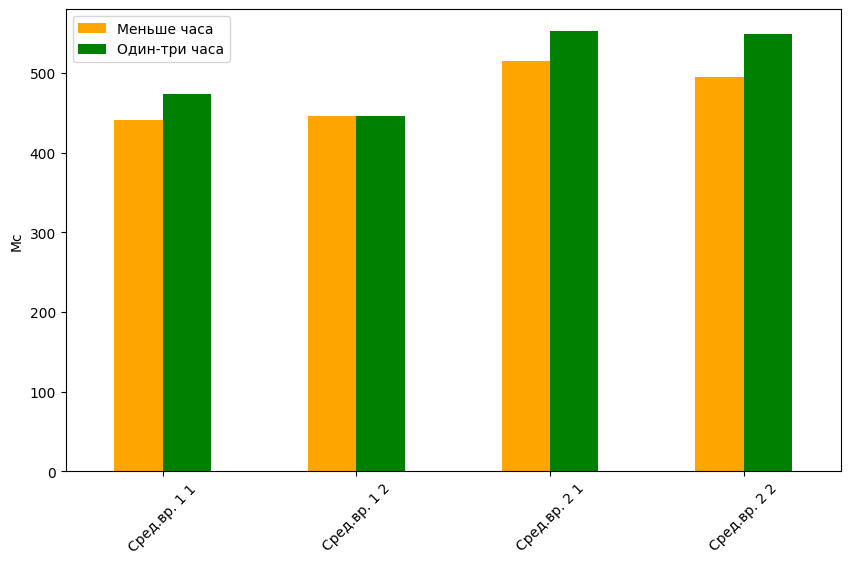

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming 'data' is your DataFrame
data = pd.DataFrame({
    'Сред.вр. 1 1': [441.8166667],
    'Сред.вр. 1 2': [446.2666667],
    #'Пропуск 1 1': [4],
    #'Пропуск 1 2': [2.5],
    'Сред.вр. 2 1': [514.9],
    'Сред.вр. 2 2': [495.1166667],
    #'Пропуск 2 1': [4.166666667],
    #'Пропуск 2 2': [2.5],
    #'Ошибка 2 1': [13.16666667],
    #'Ошибка 2 2': [11]
}, index=['Меньше часа'])

data_not_playing = pd.DataFrame({
    'Сред.вр. 1 1': [474.3],
    'Сред.вр. 1 2': [446.7],
    #'Пропуск 1 1': [3.75],
    #'Пропуск 1 2': [3.25],
    'Сред.вр. 2 1': [552.375],
    'Сред.вр. 2 2': [549.6],
    #'Пропуск 2 1': [4],
    #'Пропуск 2 2': [4.75],
    #'Ошибка 2 1': [9.75],
    #'Ошибка 2 2': [7]
}, index=['Один-три часа'])

# Combine the two DataFrames
combined_data = pd.concat([data, data_not_playing])

# Transpose the data for easier plotting
combined_data = combined_data.T



# Plotting the bar plot
ax = combined_data.plot(kind='bar', figsize=(10, 6), rot=45, color=['orange', 'green', ])
ax.set_ylabel('Мс')
#ax.set_title('Comparison of Metrics between Играют and Не играют Conditions')
plt.show()



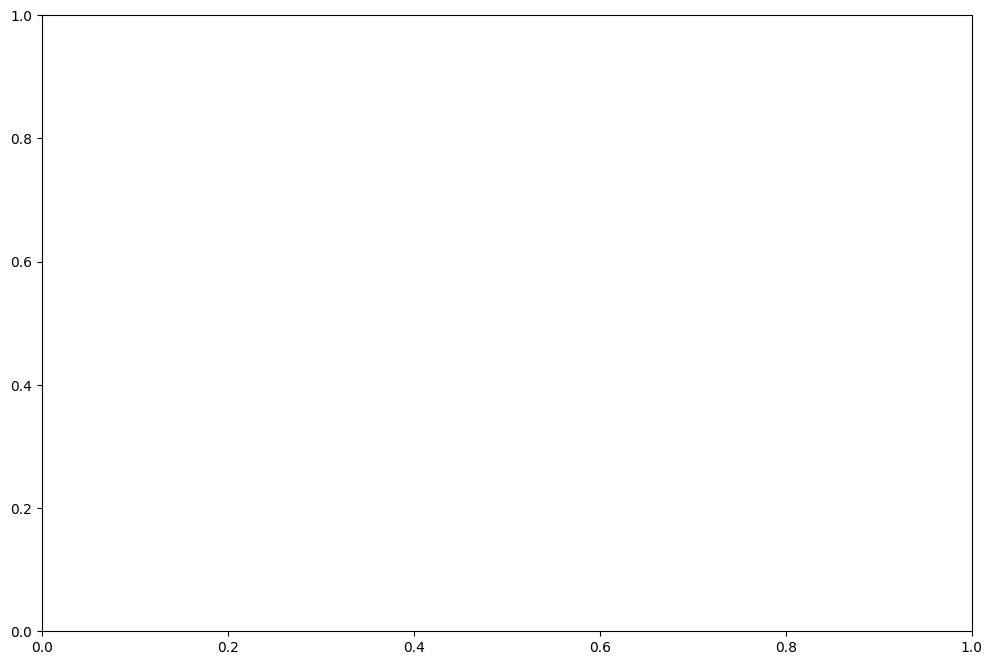

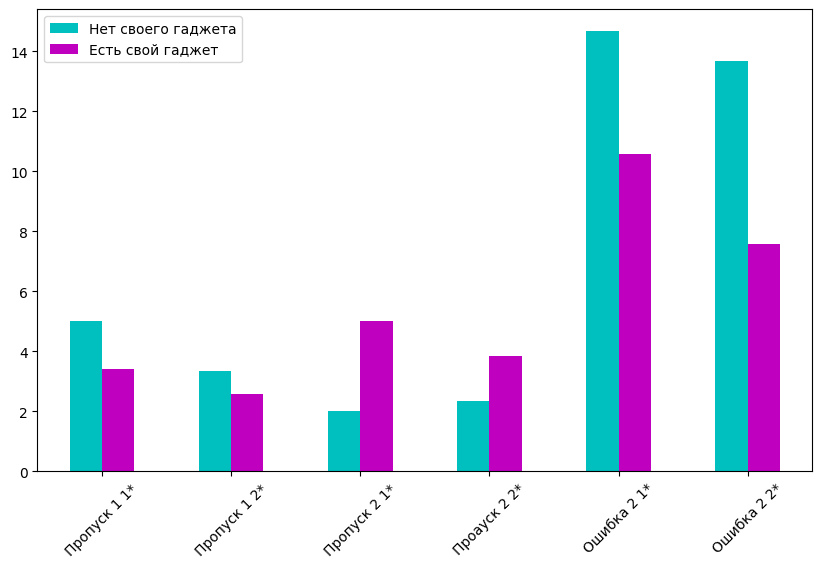

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Assuming 'data' is your DataFrame
data_before = pd.DataFrame({
    #'Сред.вр. 1 1*': [463.3],
    #'Сред.вр. 1 2*': [449.8666667],
    'Пропуск 1 1*': [5],
    'Пропуск 1 2*': [3.333333333],
    #'Сред.вр. 2 1*': [460.2],
    #'Сред.вр. 2 2*': [463.2333333],
    'Пропуск 2 1*': [2],
    'Проауск 2 2*': [2.333333333],
    'Ошибка 2 1*': [14.66666667],
    'Ошибка 2 2*': [13.66666667]
}, index=['Нет своего гаджета'])

data_after = pd.DataFrame({
    #'Сред.вр. 1 1*': [451.1714286],
    #'Сред.вр. 1 2*': [444.9714286],
    'Пропуск 1 1*': [3.428571429],
    'Пропуск 1 2*': [2.571428571],
    #'Сред.вр. 2 1*': [559.7571429],
    #'Сред.вр. 2 2*': [539.9142857],
    'Пропуск 2 1*': [5],
    'Проауск 2 2*': [3.857142857],
    'Ошибка 2 1*': [10.57142857],
    'Ошибка 2 2*': [7.571428571]
}, index=['Есть свой гаджет'])

combined_data = pd.concat([data_before, data_after])

# Transpose the data for easier plotting
combined_data = combined_data.T

# Plotting the grouped bar plot
width = 0.35
participants = np.arange(len(combined_data.columns))

fig, ax = plt.subplots(figsize=(12, 8))

ax = combined_data.plot(kind='bar', figsize=(10, 6), rot=45, color=['c', 'm', ])
# Adding labels and title
ax.set_ylabel('')
#ax.set_title('Comparison of Parameters Before and After')

plt.show()


In [ ]:
! pip install matplotlib


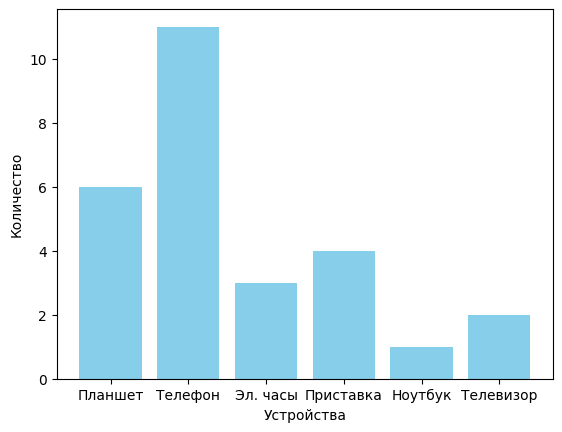

In [ ]:
import matplotlib.pyplot as plt

# Data
categories = ['Планшет', 'Телефон', 'Эл. часы', 'Приставка', 'Ноутбук', 'Телевизор']
counts = [6, 11, 3, 4, 1, 2]

# Create a bar chart
plt.bar(categories, counts, color='skyblue')

# Add labels and title
plt.xlabel('Устройства')
plt.ylabel('Количество')
#plt.title('Количество различных устройств')

# Display the plot
plt.show()


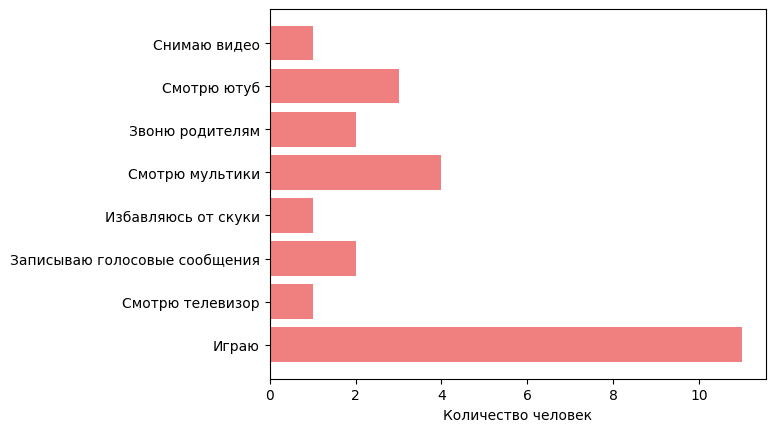

In [ ]:
import matplotlib.pyplot as plt

# Data
activities = ['Играю', 'Смотрю телевизор', 'Записываю голосовые сообщения',
              'Избавляюсь от скуки', 'Смотрю мультики', 'Звоню родителям',
              'Смотрю ютуб', 'Снимаю видео']
durations = [11, 1, 2, 1, 4, 2, 3, 1]

# Create a horizontal bar chart
plt.barh(activities, durations, color='lightcoral')

# Add labels and title
plt.xlabel('Количество человек')
#plt.ylabel('Деятельность')
#plt.title('Распределение времени по деятельностям')

# Display the plot
plt.show()


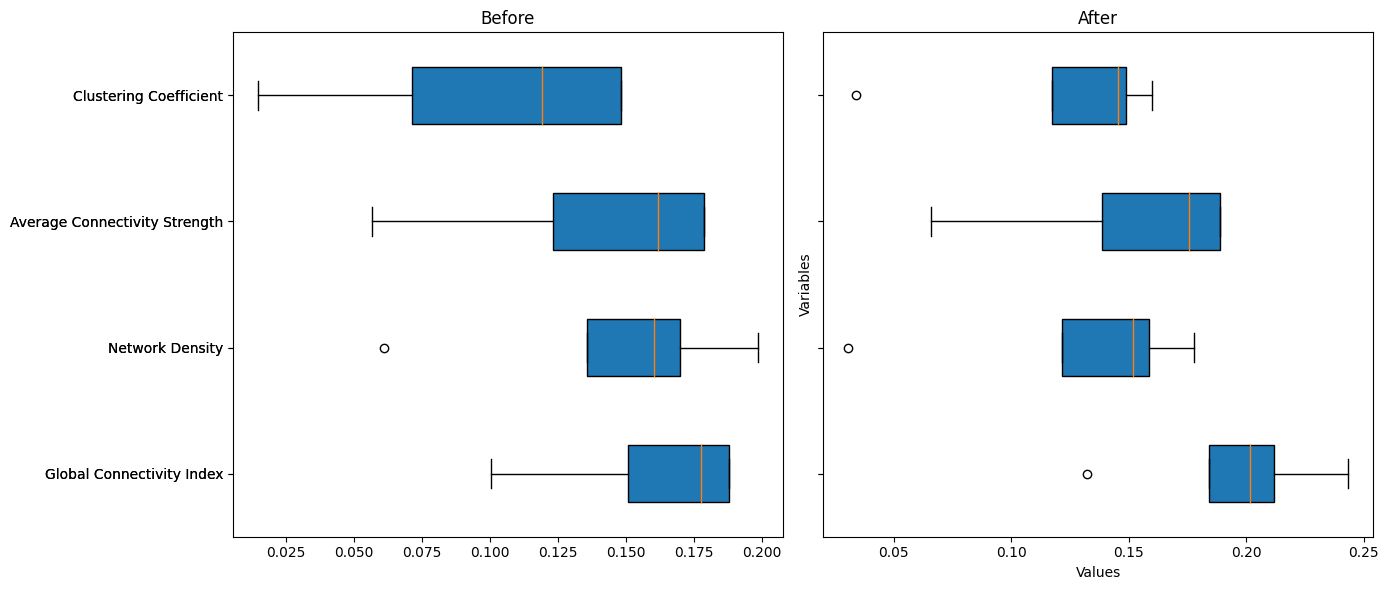

In [ ]:
import matplotlib.pyplot as plt

# Data for the "before" and "after" scenarios
before_data = [
    [0.18790269799228276, 0.1005464480874317, 0.18790269799228276, 0.1673197908631195],
    [0.1604996447664659, 0.06120218579234973, 0.1604996447664659, 0.19856223752373134],
    [0.17879058132357714, 0.05683060109289618, 0.17879058132357714, 0.14514759213888004],
    [0.148185978, 0.014754098360655738, 0.14818597846751175, 0.09049313661731591]
]

after_data = [
    [0.20157959562147942, 0.13224043715846995, 0.20157959562147942, 0.24330388807660158],
    [0.15201929576574563, 0.030601092896174863, 0.15201929576574563, 0.17776743771475143],
    [0.18866339124761222, 0.06584699453551912, 0.18866339124761222, 0.16267574852048589],
    [0.14535088109502492, 0.03415300546448088, 0.14535088109502492, 0.16000561957297502]
]

# Variable names
variable_names = [
    'Global Connectivity Index',
    'Network Density',
    'Average Connectivity Strength',
    'Clustering Coefficient'
]

# Create boxplots
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(14, 6), sharey=True)

# Before plot
axes[0].boxplot(before_data, labels=variable_names, vert=False, patch_artist=True)
axes[0].set_title('Before')

# After plot
axes[1].boxplot(after_data, labels=variable_names, vert=False, patch_artist=True)
axes[1].set_title('After')

# Add labels and title
plt.xlabel('Values')
plt.ylabel('Variables')

# Display the plot
plt.tight_layout()
plt.show()


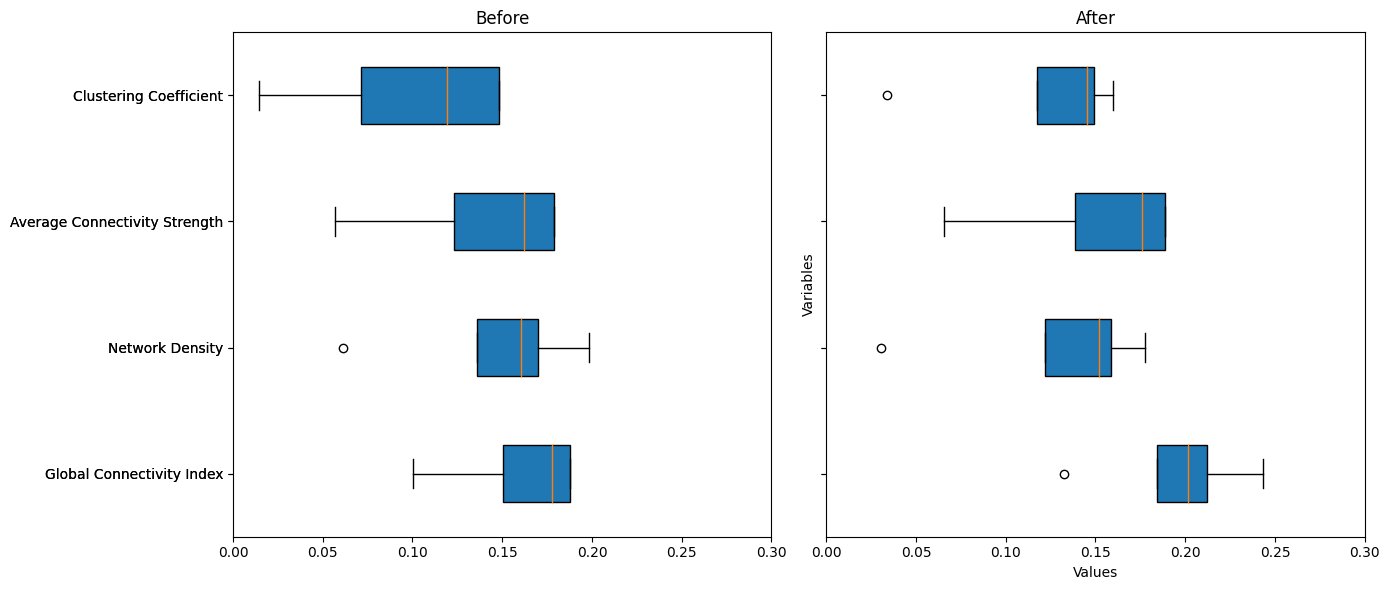

In [ ]:
import matplotlib.pyplot as plt

# Data for the "before" and "after" scenarios
before_data = [
    [0.18790269799228276, 0.1005464480874317, 0.18790269799228276, 0.1673197908631195],
    [0.1604996447664659, 0.06120218579234973, 0.1604996447664659, 0.19856223752373134],
    [0.17879058132357714, 0.05683060109289618, 0.17879058132357714, 0.14514759213888004],
    [0.148185978, 0.014754098360655738, 0.14818597846751175, 0.09049313661731591]
]

after_data = [
    [0.20157959562147942, 0.13224043715846995, 0.20157959562147942, 0.24330388807660158],
    [0.15201929576574563, 0.030601092896174863, 0.15201929576574563, 0.17776743771475143],
    [0.18866339124761222, 0.06584699453551912, 0.18866339124761222, 0.16267574852048589],
    [0.14535088109502492, 0.03415300546448088, 0.14535088109502492, 0.16000561957297502]
]

# Variable names
variable_names = [
    'Global Connectivity Index',
    'Network Density',
    'Average Connectivity Strength',
    'Clustering Coefficient'
]

# Create boxplots
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(14, 6), sharey=True)

# Before plot
axes[0].boxplot(before_data, labels=variable_names, vert=False, patch_artist=True)
axes[0].set_title('Before')
axes[0].set_xlim([0, 0.3])  # Set the same y-axis limits for both plots

# After plot
axes[1].boxplot(after_data, labels=variable_names, vert=False, patch_artist=True)
axes[1].set_title('After')
axes[1].set_xlim([0, 0.3])  # Set the same y-axis limits for both plots

# Add labels and title
plt.xlabel('Values')
plt.ylabel('Variables')

# Display the plot
plt.tight_layout()
plt.show()


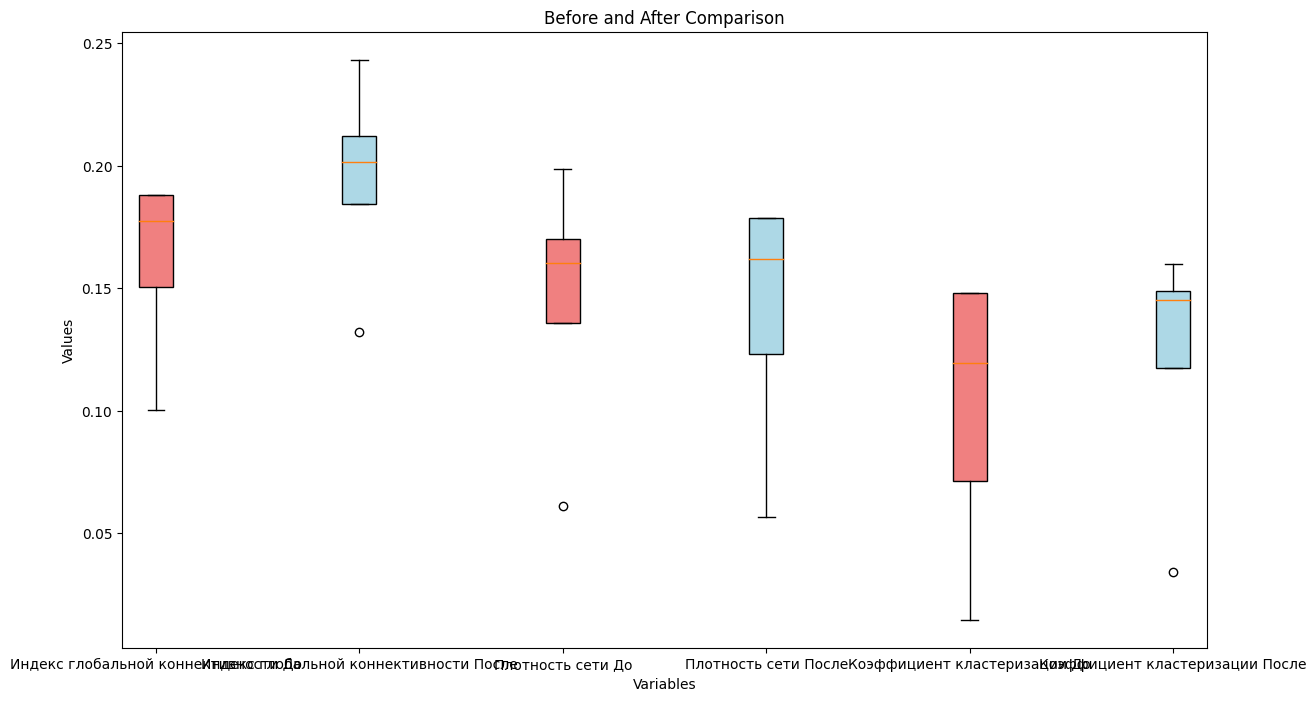

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Provided data
data = {
    'Индекс глобальной коннективности До': [0.18790269799228276, 0.1005464480874317, 0.18790269799228276, 0.1673197908631195],
    'Индекс глобальной коннективности После': [0.20157959562147942, 0.13224043715846995, 0.20157959562147942, 0.24330388807660158],
    'Плотность сети До': [0.1604996447664659, 0.06120218579234973, 0.1604996447664659, 0.19856223752373134],
    'Плотность сети После': [0.17879058132357714, 0.05683060109289618, 0.17879058132357714, 0.14514759213888004],
    'Коэффициент кластеризации До': [0.148185978, 0.014754098360655738, 0.14818597846751175, 0.09049313661731591],
    'Коэффициент кластеризации После': [0.14535088109502492, 0.03415300546448088, 0.14535088109502492, 0.16000561957297502]
}

# Variable names
variable_names = list(data.keys())

# Combine "before" and "after" data
combined_data = [data[key] for key in variable_names]

# Create positions for boxplots
positions = np.arange(1, len(variable_names) * 3, step=3)

# Create a grouped boxplot
fig, ax = plt.subplots(figsize=(14, 8))
box = ax.boxplot(combined_data, positions=positions, labels=variable_names, patch_artist=True)

# Set boxplot colors
colors = ['lightcoral', 'lightblue'] * (len(variable_names) // 2)
for patch, color in zip(box['boxes'], colors):
    patch.set_facecolor(color)

# Add labels and title
plt.xlabel('Variables')
plt.ylabel('Values')
plt.title('Before and After Comparison')

# Display the plot
plt.show()


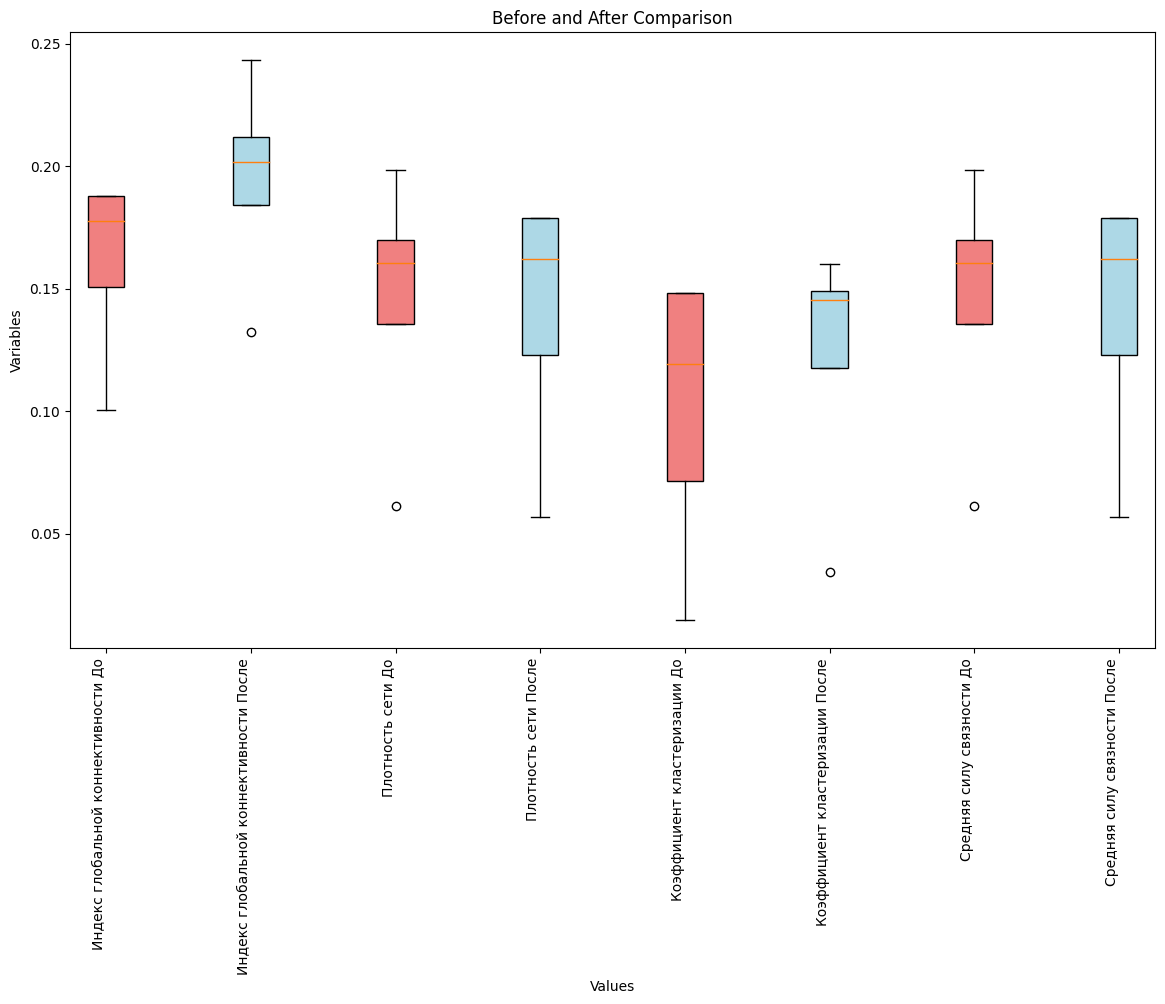

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Provided data
data = {
    'Индекс глобальной коннективности До': [0.18790269799228276, 0.1005464480874317, 0.18790269799228276, 0.1673197908631195],
    'Индекс глобальной коннективности После': [0.20157959562147942, 0.13224043715846995, 0.20157959562147942, 0.24330388807660158],
    'Плотность сети До': [0.1604996447664659, 0.06120218579234973, 0.1604996447664659, 0.19856223752373134],
    'Плотность сети После': [0.17879058132357714, 0.05683060109289618, 0.17879058132357714, 0.14514759213888004],
    'Коэффициент кластеризации До': [0.148185978, 0.014754098360655738, 0.14818597846751175, 0.09049313661731591],
    'Коэффициент кластеризации После': [0.14535088109502492, 0.03415300546448088, 0.14535088109502492, 0.16000561957297502],
    'Средняя силу связности До': [0.1604996447664659, 0.06120218579234973, 0.1604996447664659, 0.19856223752373134],
    'Средняя силу связности После': [0.17879058132357714, 0.05683060109289618, 0.17879058132357714, 0.14514759213888004]
}

# Variable names
variable_names = list(data.keys())

# Combine "before" and "after" data
combined_data = [data[key] for key in variable_names]

# Create positions for boxplots
positions = np.arange(1, len(variable_names) * 2 + 1, step=2)

# Create a grouped boxplot
fig, ax = plt.subplots(figsize=(14, 8))
box = ax.boxplot(combined_data, positions=positions, labels=variable_names, patch_artist=True, widths=0.5)

# Set boxplot colors
colors = ['lightcoral', 'lightblue'] * (len(variable_names) // 2)
for patch, color in zip(box['boxes'], colors):
    patch.set_facecolor(color)

# Add labels and title
plt.xlabel('Values')
plt.ylabel('Variables')
plt.title('Before and After Comparison')

# Rotate variable names on the side
plt.xticks(rotation=90, ha='right')

# Display the plot
plt.show()


In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Provided data
data = {
    'Индекс глобальной коннективности До': [0.18790269799228276, 0.1005464480874317, 0.18790269799228276, 0.1673197908631195],
    'Индекс глобальной коннективности После': [0.20157959562147942, 0.13224043715846995, 0.20157959562147942, 0.24330388807660158],
    'Плотность сети До': [0.1604996447664659, 0.06120218579234973, 0.1604996447664659, 0.19856223752373134],
    'Плотность сети После': [0.17879058132357714, 0.05683060109289618, 0.17879058132357714, 0.14514759213888004],
    'Коэффициент кластеризации До': [0.148185978, 0.014754098360655738, 0.14818597846751175, 0.09049313661731591],
    'Коэффициент кластеризации После': [0.14535088109502492, 0.03415300546448088, 0.14535088109502492, 0.16000561957297502],
    'Средняя силу связности До': [0.1604996447664659, 0.06120218579234973, 0.1604996447664659, 0.19856223752373134],
    'Средняя силу связности После': [0.17879058132357714, 0.05683060109289618, 0.17879058132357714, 0.14514759213888004]
}

# Variable names
variable_names = list(data.keys())

# Combine "before" and "after" data
combined_data = [data[key] for key in variable_names]

# Create positions for boxplots
positions = np.arange(1, len(variable_names) * 2 + 1, step=2)

# Create a grouped boxplot
fig, ax = plt.subplots(figsize=(14, 8))
box = ax.boxplot(combined_data, positions=positions, labels=['']*len(variable_names), patch_artist=True, widths=0.5)

# Set boxplot colors
colors = ['lightcoral', 'lightblue'] * (len(variable_names) // 2)
for patch, color in zip(box['boxes'], colors):
    patch.set_facecolor(color)

# Add variable names on the left side
for i, var_name in enumerate(variable_names):
    ax.text(0.5, positions[i], var_name, ha='right', va='center', rotation=0)

# Add labels and title
plt.xlabel('Values')
plt.ylabel('Variables')
plt.title('Before and After Comparison')

# Display the plot
plt.show()


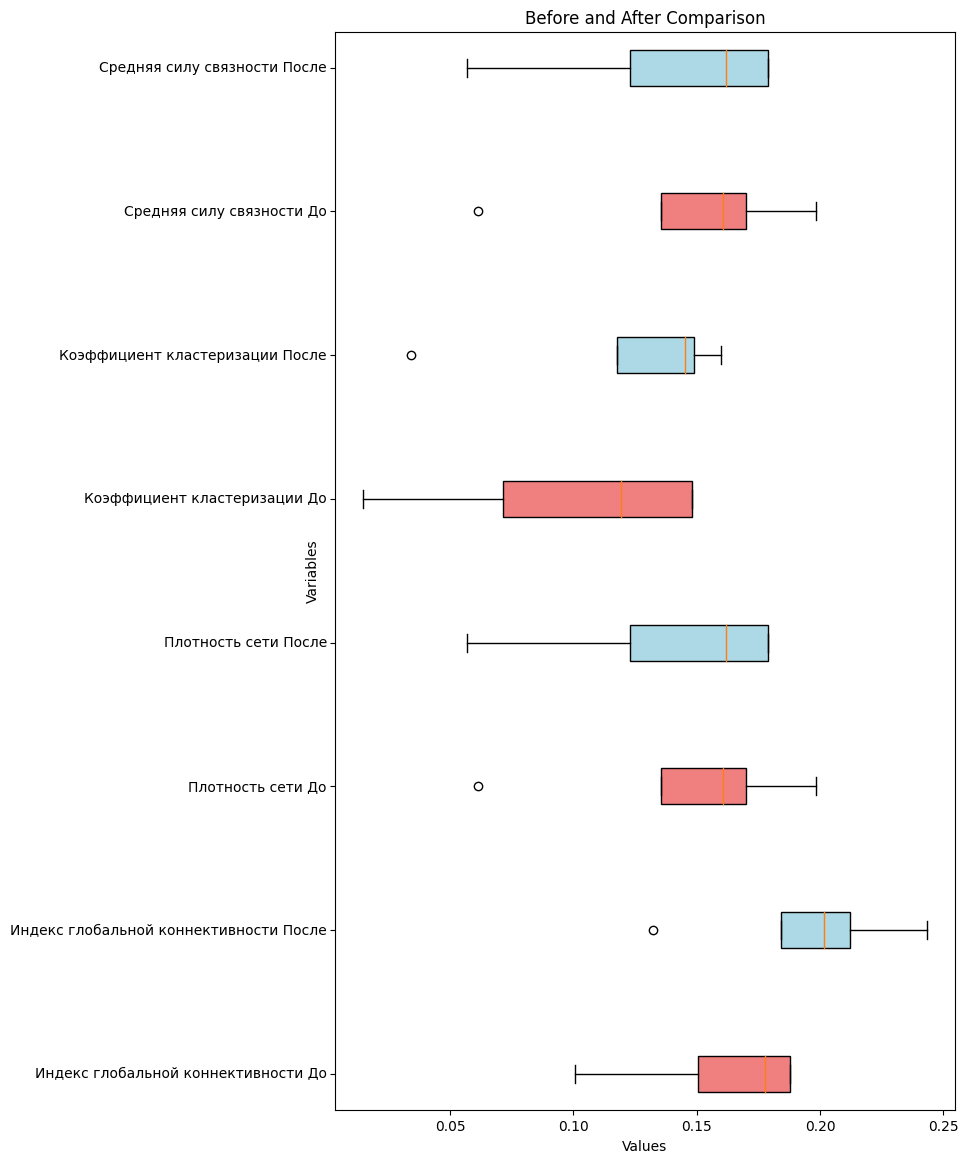

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Provided data
data = {
    'Индекс глобальной коннективности До': [0.18790269799228276, 0.1005464480874317, 0.18790269799228276, 0.1673197908631195],
    'Индекс глобальной коннективности После': [0.20157959562147942, 0.13224043715846995, 0.20157959562147942, 0.24330388807660158],
    'Плотность сети До': [0.1604996447664659, 0.06120218579234973, 0.1604996447664659, 0.19856223752373134],
    'Плотность сети После': [0.17879058132357714, 0.05683060109289618, 0.17879058132357714, 0.14514759213888004],
    'Коэффициент кластеризации До': [0.148185978, 0.014754098360655738, 0.14818597846751175, 0.09049313661731591],
    'Коэффициент кластеризации После': [0.14535088109502492, 0.03415300546448088, 0.14535088109502492, 0.16000561957297502],
    'Средняя силу связности До': [0.1604996447664659, 0.06120218579234973, 0.1604996447664659, 0.19856223752373134],
    'Средняя силу связности После': [0.17879058132357714, 0.05683060109289618, 0.17879058132357714, 0.14514759213888004]
}

# Variable names
variable_names = list(data.keys())

# Combine "before" and "after" data
combined_data = [data[key] for key in variable_names]

# Create positions for boxplots
positions = np.arange(1, len(variable_names) * 2 + 1, step=2)

# Create a grouped horizontal boxplot
fig, ax = plt.subplots(figsize=(8, 14))
box = ax.boxplot(combined_data, positions=positions, labels=['']*len(variable_names), patch_artist=True, widths=0.5, vert=False)

# Set boxplot colors
colors = ['lightcoral', 'lightblue'] * (len(variable_names) // 2)
for patch, color in zip(box['boxes'], colors):
    patch.set_facecolor(color)

# Add variable names on the left side
for i, var_name in enumerate(variable_names):
    ax.text(0, positions[i], var_name, ha='right', va='center', fontsize=10)

# Add labels and title
plt.xlabel('Values')
plt.ylabel('Variables')
plt.title('Before and After Comparison')

# Display the plot
plt.show()


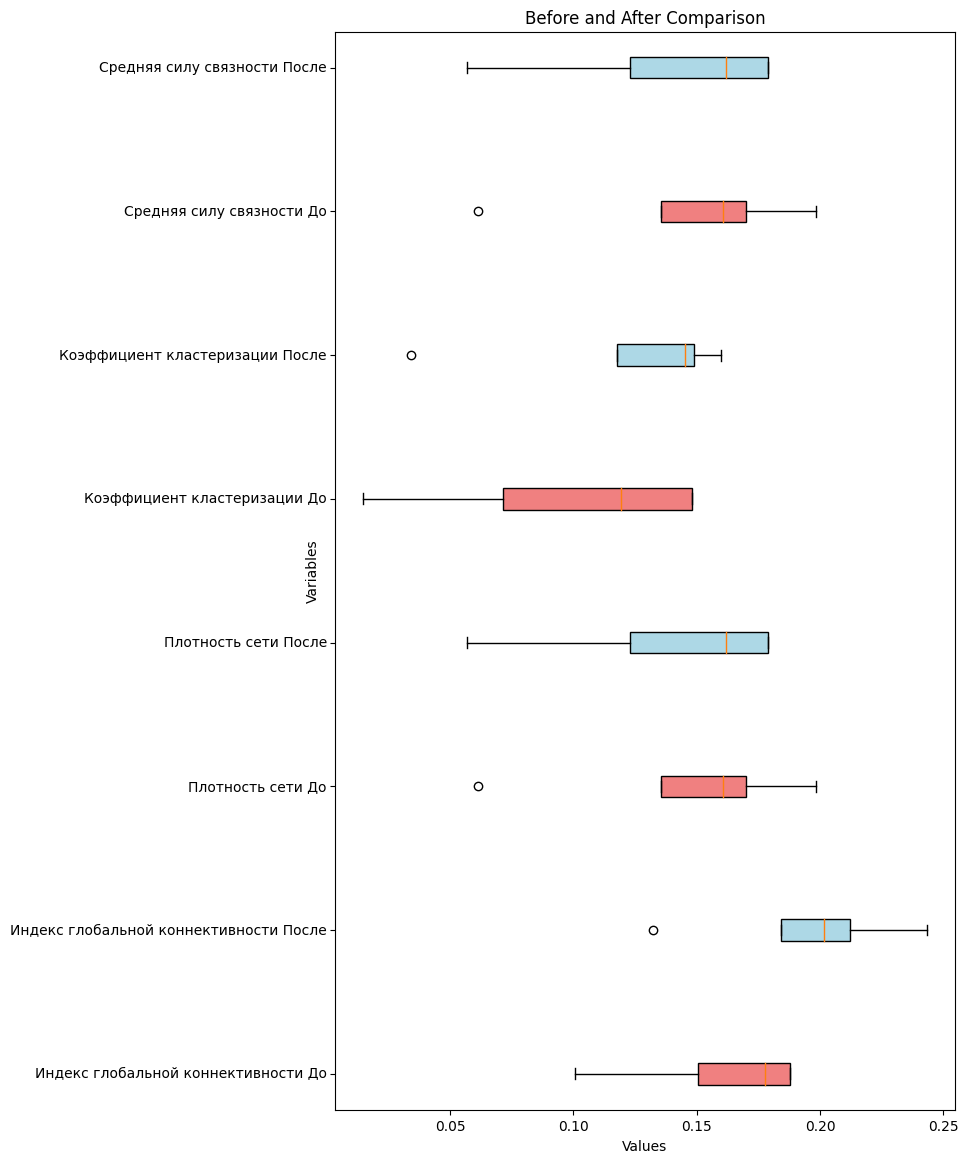

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Provided data
data = {
    'Индекс глобальной коннективности До': [0.18790269799228276, 0.1005464480874317, 0.18790269799228276, 0.1673197908631195],
    'Индекс глобальной коннективности После': [0.20157959562147942, 0.13224043715846995, 0.20157959562147942, 0.24330388807660158],
    'Плотность сети До': [0.1604996447664659, 0.06120218579234973, 0.1604996447664659, 0.19856223752373134],
    'Плотность сети После': [0.17879058132357714, 0.05683060109289618, 0.17879058132357714, 0.14514759213888004],
    'Коэффициент кластеризации До': [0.148185978, 0.014754098360655738, 0.14818597846751175, 0.09049313661731591],
    'Коэффициент кластеризации После': [0.14535088109502492, 0.03415300546448088, 0.14535088109502492, 0.16000561957297502],
    'Средняя силу связности До': [0.1604996447664659, 0.06120218579234973, 0.1604996447664659, 0.19856223752373134],
    'Средняя силу связности После': [0.17879058132357714, 0.05683060109289618, 0.17879058132357714, 0.14514759213888004]
}

# Variable names
variable_names = list(data.keys())

# Combine "before" and "after" data
combined_data = [data[key] for key in variable_names]

# Create positions for boxplots
positions = np.arange(1, len(variable_names) * 2 + 1, step=2)

# Create a grouped horizontal boxplot with reduced spacing
fig, ax = plt.subplots(figsize=(8, 14))
box = ax.boxplot(combined_data, positions=positions, labels=['']*len(variable_names), patch_artist=True, widths=0.3, vert=False)

# Set boxplot colors
colors = ['lightcoral', 'lightblue'] * (len(variable_names) // 2)
for patch, color in zip(box['boxes'], colors):
    patch.set_facecolor(color)

# Add variable names on the left side
for i, var_name in enumerate(variable_names):
    ax.text(0, positions[i], var_name, ha='right', va='center', fontsize=10)

# Add labels and title
plt.xlabel('Values')
plt.ylabel('Variables')
plt.title('Before and After Comparison')

# Display the plot
plt.show()


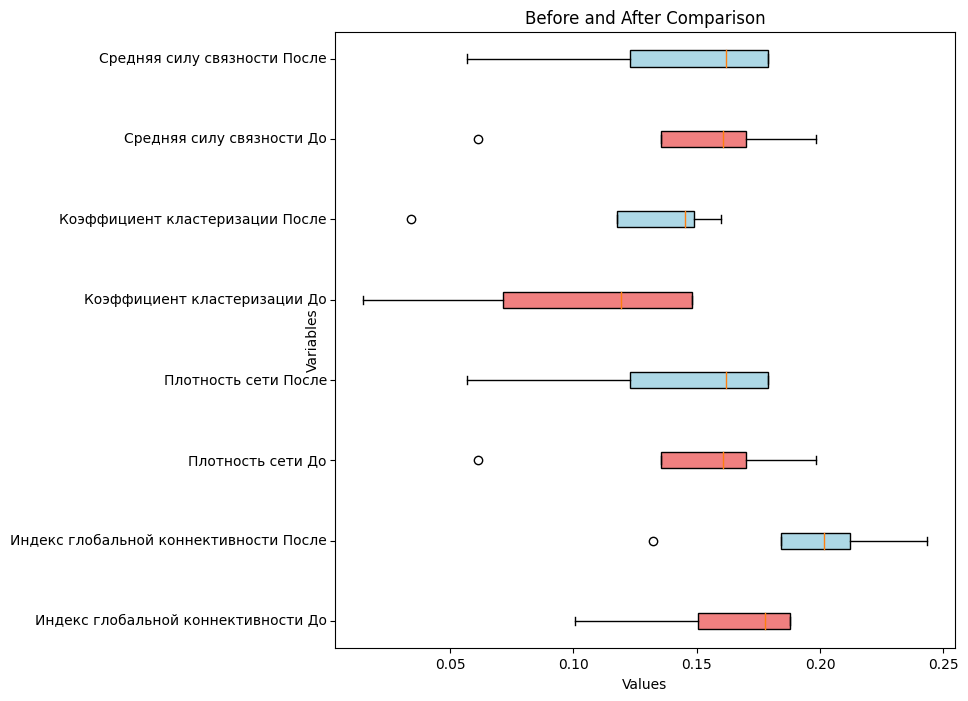

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Provided data
data = {
    'Индекс глобальной коннективности До': [0.18790269799228276, 0.1005464480874317, 0.18790269799228276, 0.1673197908631195],
    'Индекс глобальной коннективности После': [0.20157959562147942, 0.13224043715846995, 0.20157959562147942, 0.24330388807660158],
    'Плотность сети До': [0.1604996447664659, 0.06120218579234973, 0.1604996447664659, 0.19856223752373134],
    'Плотность сети После': [0.17879058132357714, 0.05683060109289618, 0.17879058132357714, 0.14514759213888004],
    'Коэффициент кластеризации До': [0.148185978, 0.014754098360655738, 0.14818597846751175, 0.09049313661731591],
    'Коэффициент кластеризации После': [0.14535088109502492, 0.03415300546448088, 0.14535088109502492, 0.16000561957297502],
    'Средняя силу связности До': [0.1604996447664659, 0.06120218579234973, 0.1604996447664659, 0.19856223752373134],
    'Средняя силу связности После': [0.17879058132357714, 0.05683060109289618, 0.17879058132357714, 0.14514759213888004]
}

# Variable names
variable_names = list(data.keys())

# Combine "before" and "after" data
combined_data = [data[key] for key in variable_names]

# Create positions for boxplots with reduced distance
positions = np.arange(1, len(variable_names) * 1.5 + 1, step=1.5)

# Create a grouped horizontal boxplot with reduced spacing
fig, ax = plt.subplots(figsize=(8, 8))
box = ax.boxplot(combined_data, positions=positions, labels=['']*len(variable_names), patch_artist=True, widths=0.3, vert=False)

# Set boxplot colors
colors = ['lightcoral', 'lightblue'] * (len(variable_names) // 2)
for patch, color in zip(box['boxes'], colors):
    patch.set_facecolor(color)

# Add variable names on the left side
for i, var_name in enumerate(variable_names):
    ax.text(0, positions[i], var_name, ha='right', va='center', fontsize=10)

# Add labels and title
plt.xlabel('Values')
plt.ylabel('Variables')
plt.title('Before and After Comparison')

# Display the plot
plt.show()


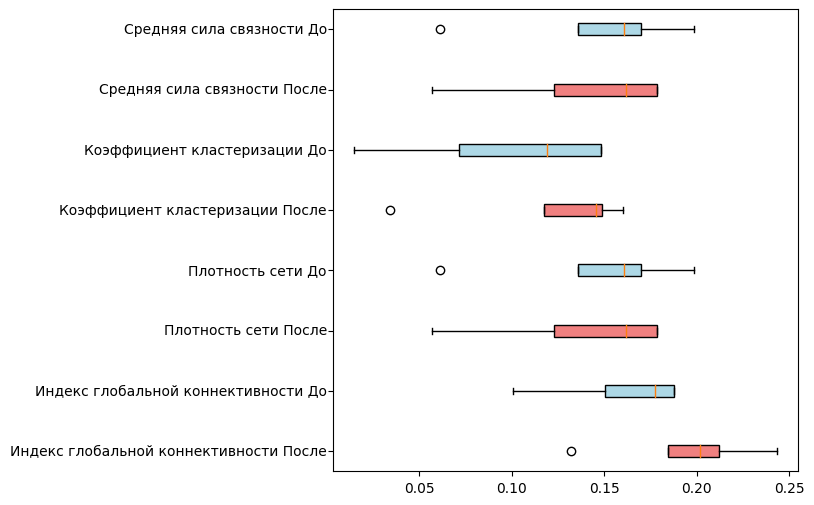

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Provided data
data = {
    'Индекс глобальной коннективности До': [0.18790269799228276, 0.1005464480874317, 0.18790269799228276, 0.1673197908631195],
    'Индекс глобальной коннективности После': [0.20157959562147942, 0.13224043715846995, 0.20157959562147942, 0.24330388807660158],
    'Плотность сети До': [0.1604996447664659, 0.06120218579234973, 0.1604996447664659, 0.19856223752373134],
    'Плотность сети После': [0.17879058132357714, 0.05683060109289618, 0.17879058132357714, 0.14514759213888004],
    'Коэффициент кластеризации До': [0.148185978, 0.014754098360655738, 0.14818597846751175, 0.09049313661731591],
    'Коэффициент кластеризации После': [0.14535088109502492, 0.03415300546448088, 0.14535088109502492, 0.16000561957297502],
    'Средняя сила связности До': [0.1604996447664659, 0.06120218579234973, 0.1604996447664659, 0.19856223752373134],
    'Средняя сила связности После': [0.17879058132357714, 0.05683060109289618, 0.17879058132357714, 0.14514759213888004]
}

# Swap the positions of "До" and "После" in variable names
variable_names = [name.replace('До', 'Temp').replace('После', 'До').replace('Temp', 'После') for name in data.keys()]

# Combine "before" and "after" data
combined_data = [data[key] for key in variable_names]

# Create positions for boxplots with reduced distance
positions = np.arange(1, len(variable_names) * 1.5 + 1, step=1.5)

# Create a grouped horizontal boxplot with reduced spacing
fig, ax = plt.subplots(figsize=(6, 6))
box = ax.boxplot(combined_data, positions=positions, labels=['']*len(variable_names), patch_artist=True, widths=0.3, vert=False)

# Set boxplot colors
colors = ['lightcoral', 'lightblue'] * (len(variable_names) // 2)
for patch, color in zip(box['boxes'], colors):
    patch.set_facecolor(color)

# Add variable names on the left side
for i, var_name in enumerate(variable_names):
    ax.text(0, positions[i], var_name, ha='right', va='center', fontsize=10)

# Add labels and title
#plt.xlabel('Values')
#plt.ylabel('Variables')
#plt.title('Before and After Comparison')

# Display the plot
plt.show()
